In [23]:
import matplotlib.pyplot as plt
import mesa as ms
import pylab as p
import numpy as np



%matplotlib inline 
plt.rcParams['figure.figsize'] = 12, 6  # that's default image size for this interactive session

data_path = "/Users/tassos/repos/CE_mesa/working/LOGS/"
#data_path = "/Users/tassos/Dropbox/Projects/mesa_projects/CE/M31_2015_LRN/M31_2015_LRN_explicit/LOGS/"


a = ms.mesa(data_path=data_path, parallel=True, abundances=False, log_abundances = True, Yaxis='mass', Xaxis="log_inv_star_age",czones=False, Variable='v_div_vesc', orbit=True)

print len(a.profiles)

Process running in parallel on  8  cores
Process running in parallel on  8  cores
22


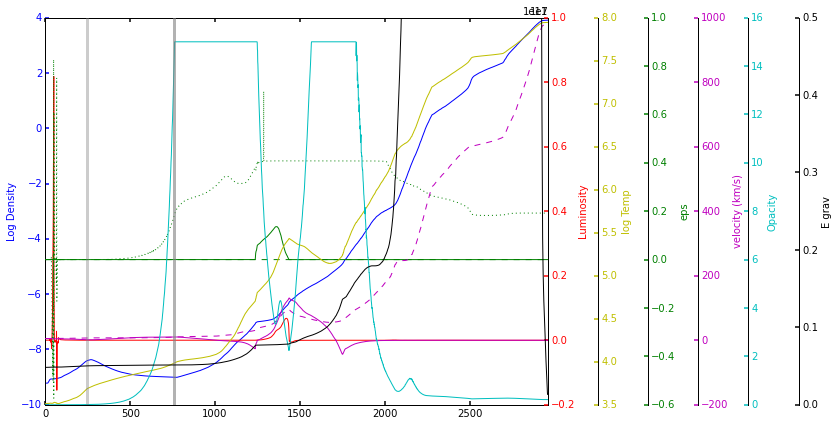

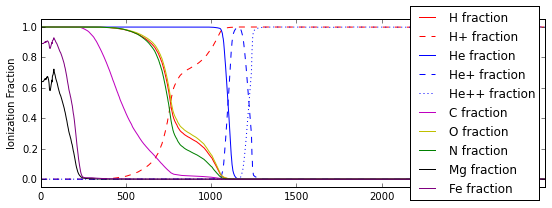

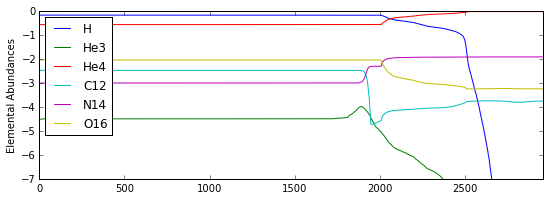

/Users/tassos/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:193: RuntimeWarning: divide by zero encountered in log10
/Users/tassos/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:195: RuntimeWarning: invalid value encountered in log10
/Users/tassos/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:196: RuntimeWarning: divide by zero encountered in log10


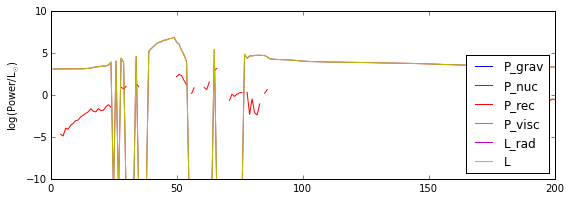

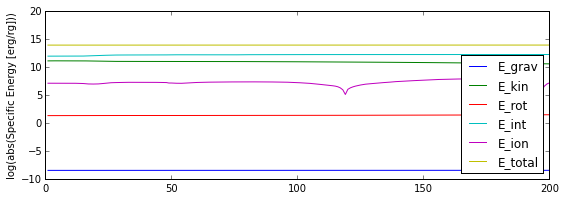

In [25]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)


par1 = host.twinx()

par2 = host.twinx()
par2.spines["right"].set_position(("axes", 1.2))
make_patch_spines_invisible(par2)
par2.spines["right"].set_visible(True)

par3 = host.twinx()
par3.spines["right"].set_position(("axes", 1.3))
make_patch_spines_invisible(par3)
par3.spines["right"].set_visible(True)

par4 = host.twinx()
par4.spines["right"].set_position(("axes", 1.1))
make_patch_spines_invisible(par4)
par4.spines["right"].set_visible(True)

par5 = host.twinx()
par5.spines["right"].set_position(("axes", 1.4))
make_patch_spines_invisible(par5)
par5.spines["right"].set_visible(True)

par6 = host.twinx()
par6.spines["right"].set_position(("axes", 1.5))
make_patch_spines_invisible(par6)
par6.spines["right"].set_visible(True)



#i=6
i=len(a.profiles)-1



# Set x-variable
x = a.profiles[i]["zone"]
#x = 10**a.profiles[i]["logR"]
#x = a.profiles[i]["q"]


tau = 10.**a.profiles[i]["logtau"]

# tau_zone = np.max([np.where(tau < 1)])
# tau_x = x[tau_zone]
# plt.axvline(tau_x, color='gray', linewidth=3, alpha=0.2)

tau_zone = np.max([np.where(tau < 10)])
tau_x = x[tau_zone]
plt.axvline(tau_x, color='gray', linewidth=3, alpha=0.4)

tau_zone = np.max([np.where(tau < 100)])
tau_x = x[tau_zone]
plt.axvline(tau_x, color='gray', linewidth=3, alpha=0.6)




#fig = plt.figure(figsize=(10,6))

logD, = host.plot(x,a.profiles[i]["logRho"], label="log Density", color='b')
lum, = par1.plot(x,a.profiles[i]["luminosity"], label="Luminosity", color='r')
eps_visc, = par2.plot(x,a.profiles[i]["eps_visc"], label=r"$\epsilon_{\rm visc}$", color='g', linestyle='solid')
eps_grav, = par2.plot(x,a.profiles[i]["eps_grav"], label=r"$\epsilon_{\rm grav}$", color='g', linestyle='dashed')
eps_nuc, = par2.plot(x,a.profiles[i]["eps_recombination"], label=r"$\epsilon_{\rm rec}$", color='g', linestyle='dotted')
vel, = par3.plot(x,a.profiles[i]["velocity"]/1.0e5, label="velocity", color='m')
cs, = par3.plot(x,a.profiles[i]["csound"]/1.0e5, label="Sound speed", color='m', linestyle='dashed')
temp, = par4.plot(x,a.profiles[i]["logT"], label="log Temp", color='y')
opacity, = par5.plot(x,a.profiles[i]["opacity"], label="opacity", color='c')
#brunt_N2, = par6.plot(x, a.profiles[i]["brunt_N2"], label="Brunt-Vaisala", color='k')
e_grav, = par6.plot(x, a.profiles[i]["mass"]/10**a.profiles[i]["logR"], label="e_grav", color='k')


# Label y-axes
host.set_ylabel('Log Density')
par1.set_ylabel('Luminosity')
par2.set_ylabel('eps')
par3.set_ylabel('velocity (km/s)')
par4.set_ylabel('log Temp')
par5.set_ylabel('Opacity')
#par6.set_ylabel('Brunt-Vaisala')
par6.set_ylabel('E grav')


# Set y-axis label colors
host.yaxis.label.set_color(logD.get_color())
par1.yaxis.label.set_color(lum.get_color())
par2.yaxis.label.set_color(eps_grav.get_color())
par3.yaxis.label.set_color(vel.get_color())
par4.yaxis.label.set_color(temp.get_color())
par5.yaxis.label.set_color(opacity.get_color())
#par6.yaxis.label.set_color(brunt_N2.get_color())
par6.yaxis.label.set_color(e_grav.get_color())

# Y-limit
par6.set_ylim(0.0, 0.5)

# Set y-axis tick colors
tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=logD.get_color(), **tkw)
par1.tick_params(axis='y', colors=lum.get_color(), **tkw)
par2.tick_params(axis='y', colors=eps_grav.get_color(), **tkw)
par3.tick_params(axis='y', colors=vel.get_color(), **tkw)
par4.tick_params(axis='y', colors=temp.get_color(), **tkw)
par5.tick_params(axis='y', colors=opacity.get_color(), **tkw)
#par6.tick_params(axis='y', colors=brunt_N2.get_color(), **tkw)
par6.tick_params(axis='y', colors=e_grav.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

# Set x-limits
plt.xlim(0, max(x))
#plt.xlim(0, 20)


# Legend
lines = [logD, lum, temp, eps_grav, eps_visc, eps_nuc, vel, cs, opacity, e_grav]
#host.legend(lines, [l.get_label() for l in lines], loc=2)

plt.tight_layout()

plt.show()



# Now, let's plot the ionization states of H, He

fig, host = plt.subplots(figsize=(11.2,3))
fig.subplots_adjust(right=0.75)

#par1 = host.twinx()
plt.plot(x,a.profiles[i]["neutral_fraction_H"], label="H fraction", color='r')
plt.plot(x,1.0 - a.profiles[i]["neutral_fraction_H"], label="H+ fraction", color='r', linestyle='dashed')
plt.plot(x,a.profiles[i]["neutral_fraction_He"], label="He fraction", color='b')
frac_He_II = 2.0 - 2.0 * a.profiles[i]["neutral_fraction_He"] - a.profiles[i]["avg_charge_He"]
frac_He_III = 1.0 - a.profiles[i]["neutral_fraction_He"] - frac_He_II
plt.plot(x,frac_He_II, label="He+ fraction", color='b', linestyle='dashed')
plt.plot(x,frac_He_III, label="He++ fraction", color='b', linestyle='dotted')

plt.plot(x,a.profiles[i]["neutral_fraction_C"], label="C fraction", color='m')
plt.plot(x,a.profiles[i]["neutral_fraction_O"], label="O fraction", color='y')
plt.plot(x,a.profiles[i]["neutral_fraction_N"], label="N fraction", color='g')
plt.plot(x,a.profiles[i]["neutral_fraction_Mg"], label="Mg fraction", color='k')
plt.plot(x,a.profiles[i]["neutral_fraction_Fe"], label="Fe fraction", color='purple')

plt.xlim(0,max(x))
plt.ylabel("Ionization Fraction")
plt.ylim(-0.05, 1.05)

plt.legend(loc=5)

plt.show()



# Now, let's plot the abundances of elements

fig, host = plt.subplots(figsize=(11.2,3))
fig.subplots_adjust(right=0.75)

plt.plot(x,np.log10(a.profiles[i]["h1"]), label="H")
plt.plot(x,np.log10(a.profiles[i]["he3"]), label="He3")
plt.plot(x,np.log10(a.profiles[i]["he4"]), label="He4")
plt.plot(x,np.log10(a.profiles[i]["c12"]), label="C12")
plt.plot(x,np.log10(a.profiles[i]["n14"]), label="N14")
plt.plot(x,np.log10(a.profiles[i]["o16"]), label="O16")

plt.xlim(0,max(x))
plt.ylabel("Elemental Abundances")
plt.ylim(-7.0, 0.0)

plt.legend(loc=2)

plt.show()




# Now, let's plot power sources and sinks and compare to luminosity

fig, host = plt.subplots(figsize=(11.2,3))
fig.subplots_adjust(right=0.75)
dm = a.profiles[i]["dm"]
Lsun = 3.828e33 #erg/s 
plt.plot(x,np.log10(a.profiles[i]["eps_grav"]*dm/Lsun), label="P_grav")
plt.plot(x,np.log10(a.profiles[i]["eps_nuc"]*dm/Lsun), label="P_nuc")
plt.plot(x,np.log10(a.profiles[i]["eps_recombination"]*dm/Lsun), label="P_rec")
plt.plot(x,np.log10(a.profiles[i]["eps_visc"]*dm/Lsun), label="P_visc")
plt.plot(x,a.profiles[i]["log_Lrad_div_L"]+a.profiles[i]["logL"], label="L_rad")
plt.plot(x,a.profiles[i]["logL"], label="L")

plt.xlim(0,200)
plt.ylabel("log(Power/L$_\odot$)")
plt.ylim(-10.0, 10)




plt.legend(loc=4)
plt.show()



# Now, let's plot energy componentsat each cell

fig, host = plt.subplots(figsize=(11.2,3))
fig.subplots_adjust(right=0.75)
dm = a.profiles[i]["dm"]
Lsun = 3.828e33 #erg/s 
G = 6.67259e-8
plt.plot(x,np.log10(np.abs(G*a.profiles[i]["mass"]/10**a.profiles[i]["logR"])), label="E_grav")
plt.plot(x,np.log10(np.abs(0.5*a.profiles[i]["velocity"]**2)), label="E_kin")
plt.plot(x,np.log10(np.abs(0.5*a.profiles[i]["v_rot"]**2)), label="E_rot")
plt.plot(x,np.log10(np.abs(a.profiles[i]["energy"])), label="E_int")
plt.plot(x,np.log10(np.abs(a.profiles[i]["ionization_energy"])), label="E_ion")
plt.plot(x,np.log10(np.abs(a.profiles[i]["total_energy"])), label="E_total")

plt.xlim(0,200)
plt.ylabel("log(abs(Specific Energy [erg/rg]))")
#plt.ylim(-10.0, 10)




plt.legend(loc=4)
plt.show()





In [ ]:
a.SetParameters(Variable='eps_nuc', cmap_dynamic_range=5, tau100=True, Yaxis='radius', Xaxis='star_age', czones=True)
a.Kippenhahn()

In [ ]:
a.SetParameters(cmap_dynamic_range=1.0, signed_log_cmap=False,Yaxis='radius', tau10=True, tau100= True,Xaxis="star_age", czones=True, Variable='v_div_vesc')
a.Kippenhahn()

In [ ]:
a.SetParameters(Yaxis="radius", Xaxis='model_number',Variable='v_div_csound', tau10=True, tau100=True, cmap_dynamic_range=2.4,signed_log_cmap=False)
a.Kippenhahn()

In [ ]:
a.SetParameters(Yaxis="radius", Xaxis='model_number',Variable='conv_vel_div_csound', tau10=True, tau100=True, cmap_dynamic_range=13,signed_log_cmap=False)
a.Kippenhahn()

In [ ]:
a.SetParameters(cmap_dynamic_range=5, signed_log_cmap=False,Yaxis='radius', Xaxis="star_age", czones=True, tau100= True, Variable='omega_div_omega_crit')
a.Kippenhahn()

In [ ]:
a.SetParameters(Variable='total_energy', Xaxis="model_number", Yaxis="radius", cmap_dynamic_range=5,signed_log_cmap=True, tau100=True)
a.Kippenhahn()

In [ ]:
a.SetParameters(cmap_dynamic_range=10, signed_log_cmap=False,Yaxis='radius', Xaxis="model_number", czones=True, Variable='super_ad')
a.Kippenhahn()

In [ ]:
a.SetParameters(Variable='Lrad_div_Ledd', cmap_dynamic_range=5)
a.Kippenhahn()

In [ ]:
a.SetParameters(Xaxis="star_age", Yaxis="radius", Variable='t_thermal', cmap_dynamic_range=7)
a.Kippenhahn()

In [ ]:
a.SetParameters(Yaxis="radius", Variable='t_dynamical', Xaxis="model_number", cmap_dynamic_range=5)
a.Kippenhahn()

In [ ]:
a.SetParameters(Yaxis="radius", Variable='t_thermal_div_t_dynamical', Xaxis="model_number", cmap_dynamic_range=10)
a.Kippenhahn()

In [ ]:
a.SetParameters(Yaxis="radius", Variable='opacity',Xaxis='model_number', cmap_dynamic_range=5)
a.Kippenhahn()

In [ ]:
a.SetParameters(Variable='total_energy', Xaxis="model_number", Yaxis="radius", cmap_dynamic_range=5,signed_log_cmap=True, tau100=True)
a.Kippenhahn()

In [ ]:
plt.plot(a.history['star_age']*365, a.history["CE_energy_rate"], color='k')
plt.xlabel('Star Age (days)', size=20)
plt.ylabel(r'$L_{\rm CE}\ (erg/s)$', size=20)
plt.yscale('log')
#plt.ylim(1.0e38, 2.0e40)
plt.show()

In [ ]:
plt.plot(a.history['star_age']*365, 10**a.history["log_Teff"], color='k')
plt.xlabel("Star Age (days)", size=20)
plt.ylabel(r'$T_{\rm eff}\ (K)$', size=20)
plt.show()

In [ ]:
plt.plot(a.history['star_age']*365, a.history["log_L"], color='k')
plt.xlabel("Star Age (days)", size=20)
plt.ylabel(r"${\rm log}\ L\ (L_{\odot})$", size=20)
plt.show()

In [ ]:
plt.plot(a.history['log_Teff'], a.history["log_L"], color='k')
xwidth = max(a.history['log_Teff']) - min(a.history['log_Teff'])
plt.xlim(0.1*xwidth + max(a.history['log_Teff']), -0.1*xwidth + min(a.history['log_Teff']))
plt.xlabel(r"${\rm log}\ {\rm T}_{\rm eff}\ (K)$", size=20)
plt.ylabel(r"${\rm log}\ L\ (L_{\odot})$", size=20)
aa=1
bb=4
MM =16.
AA = 1./101.
BB = 7./51.
CC = 13./51.
DD = np.log10(4000)
logL_hayashi = np.linspace(np.min(a.history["log_L"]), np.max(a.history["log_L"]), num=20)
logTeff_hayashi = AA*logL_hayashi + BB* np.log10(MM) + CC*np.log10(0.5) + DD
print logL_hayashi
print logTeff_hayashi
plt.plot(logTeff_hayashi, logL_hayashi, color='g')
plt.show()

In [ ]:
secyer = 31622400.0

lum = 10.0**a.history['log_L']
time_step = 10.0**a.history['log_dt'] * secyer
time = a.history["star_age"]

E_rad = np.cumsum(lum*time_step)
plt.plot(time, np.log10(E_rad * 3.839e33), color='k', label="Radiated away")


E_CE = np.cumsum(time_step*a.history["CE_energy_rate"])
plt.plot(time, np.log10(E_CE), color='k', linestyle='dashed', label="Injected")

Msun = 1.988e33
G = 6.6725e-8
Rsun = 6.957e10
E_available = G*a.history['he_core_mass'][-1]*Msun*Msun/(0.34*Rsun)
print E_available


plt.axhline(np.log10(E_available), color='k', linestyle='dotted', label="Available from orbit")
#plt.text("")

plt.xlabel('Star Age (yr)', size=16)
plt.ylabel('Cumulative Energy (erg)', size=16)

plt.ylim(42, 50)


plt.legend(loc=4, fontsize=16)

plt.show()

In [ ]:
plt.plot(a.history["star_age"], np.log10(a.history['eta_pulse_wind']), color='k')
plt.xlabel("Star Age (yr)", size=20)
plt.ylabel(r"n pulsational wind ", size=20)
plt.show()

In [ ]:
plt.plot(a.history["model_number"], a.history['log_dt'], color='k')
plt.xlabel("Star Age (yr)", size=20)
plt.ylabel(r" log(dt/yr)", size=20)
plt.show()

In [ ]:
a.SetParameters(Yaxis="radius", Variable='j_rot', cmap_dynamic_range=5,signed_log_cmap=False)
a.Kippenhahn()

In [ ]:

a.SetParameters(Yaxis="radius", Variable='extra_heat', Xaxis='model_number', cmap_dynamic_range=5,signed_log_cmap=False)
a.Kippenhahn()

In [ ]:
a.SetParameters(Yaxis="radius", Variable='density', cmap_dynamic_range=10,signed_log_cmap=False)
a.Kippenhahn()

In [ ]:
a.SetParameters(Yaxis="radius", Variable='pressure', cmap_dynamic_range=15,signed_log_cmap=False)
a.Kippenhahn()

In [ ]:
a.SetParameters(Yaxis="radius", Variable='temperature', cmap_dynamic_range=5,signed_log_cmap=False)
a.Kippenhahn()